# Session 1 - Introduction to Geospatial Data
This workshop covers the fundamentals of geospatial management with Python. The objective is to provide the student with the fundamental knowledge to process, manage and visualize time series geospatial data in Python. Python codes are written and executed in Jupyter Notebook. Users are provided with the respective databases. Session 1 will be an introduction to the course, where we will explore the basics of shapefiles.


# Table of Contents
- [1. Introduction to geospatial data in Python](#t1)
  - [1.1. What is geospatial data?](#t11)
  - [1.2. Setting up the environment](#t12)
- [2. Geopandas](#t2)
  - [2.1. Creating a GeoDataFrame](#t21)
  - [2.2. Reading a shapefile](#t22)
  - [2.3. Customizing the shapefile plot](#t23)

In [105]:
import time
start = time.time()

# <a id="t1"></a>1. Introduction to geospatial data in Python

## <a id="t11"></a>1.1 What is Geospatial Data?

Geospatial data refers to information that describes objects, events, or other features with a location on the Earth’s surface. This data includes geographic coordinates (such as latitude and longitude) that allow us to map and analyze spatial relationships and patterns. Geospatial data can generally be divided into two main types:

- **Vector Data**: Represents features using points, lines, and polygons. For example:
  - **Points** might represent cities, landmarks, or specific data collection sites.
  - **Lines** might represent roads, rivers, or other linear features.
  - **Polygons** could represent boundaries, such as countries, provinces, or forest areas.

- **Raster Data**: Consists of a grid of pixels, each with a value representing a specific attribute, like temperature, elevation, or land cover. Satellite images and digital elevation models (DEMs) are common examples of raster data.

<img src="../03_plots/ecuador_land_use_1985.jpg" alt="Ecuador Land Use 1985" width="600"/>


### Why use geospatial data?

Geospatial data is essential for understanding and solving spatial problems in various fields. In Social Sciences, it helps to study demographic patterns, socioeconomic trends or regional disparities. 

In this course, we will explore techniques to work with geospatial data in Python, using libraries that make it easy to load, analyze, and visualize this data.


<img src="../03_plots/vietnam_example.png" alt="Vietnam" width="600"/>


## <a id="t12"></a>1.2. Setting up the environment

To get started with geospatial data in Python, it's helpful to create a new Anaconda environment. This allows you to manage dependencies specifically for geospatial analysis without impacting your other Python projects. It also prevents problems with other libraries which might not be compatible with those used for geospatial analysis.

### Step 1: Open Anaconda Prompt

1. Launch Anaconda Navigator, and open the **Anaconda Prompt**.
2. Alternatively, you can use your terminal if Anaconda is installed globally.

### Step 2: Create a New Environment

To create a new environment with Python, run the following command in your Anaconda Prompt:

```bash
conda create -n geo_env python
```

### Step 3: Activate the Environment
After creating the environment, activate it with the following command:

```bash
conda activate geo_env
```

### Step 4: Install Geospatial Libraries
We will be using the following main libraries so it is important to have installed beforehand. We will be installing other libraries as we progress through the course. You can install them in a Notebook cell

```python
!pip install geopandas georasters rasterio shapely
```


# <a id="t2"></a>2. Geopandas

GeoPandas is an open source library developed to make working with geospatial data in python easier. GeoPandas extends the datatypes used by pandas to allow spatial operations on geometric types. Geometric operations are performed by shapely. Geopandas further depends on pyogrio for file access and matplotlib for plotting.

In [106]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import geopandas as gpd

## <a id="t21"></a>2.1. Creating a GeoDataFrame

A GeoDataFrame is a data structure in Python provided by the Geopandas library, specifically designed to store and manipulate geospatial data. It extends the functionality of a traditional pandas DataFrame by adding support for geometric operations, allowing it to handle spatial data (like points, lines, and polygons) alongside standard tabular data.

### `.Point`
We can use the `.Point` function to create coordinates in a list. Then, we can convert this spatial information into a dataframe.

In [107]:
from shapely.geometry import Point

# We create a list of Points with x and y coordinates
points = [Point(10, 20), Point(15, 24), Point(21, 14)]

# We then create a GeoDataFrame with a geometry column represented by the list of Points
gdf = gpd.GeoDataFrame({'name': ['A', 'B', 'C'], 'geometry': points})

print(gdf)

  name       geometry
0    A  POINT (10 20)
1    B  POINT (15 24)
2    C  POINT (21 14)


A GeoDataFrame has a special column, usually named geometry, that stores geometric shapes such as points, lines, or polygons. Each entry in this column represents the spatial data for a single row, and Geopandas uses this column to understand the spatial aspect of the data.

<Axes: >

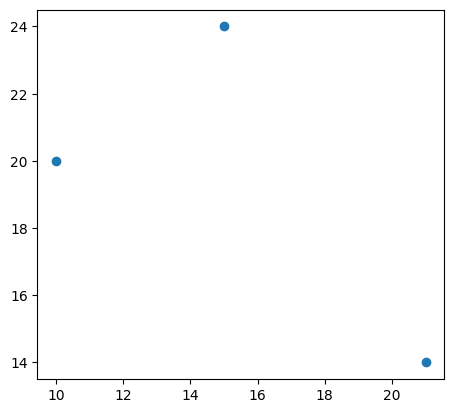

In [108]:
gdf.plot()

### `.LineString`

We can also use `.LineString` to connect the points with a line

In [109]:
from shapely.geometry import LineString

In [110]:
# We create a list of Points with x and y coordinates
points = [Point(10, 20), Point(15, 24), Point(21, 14)]

# We create a LineString object to connect the points
line = LineString([(point.x, point.y) for point in points])

# We then create a GeoDataFrame with a geometry column represented by the line
gdf = gpd.GeoDataFrame({'name': ['A'], 'geometry': [line]})

print(gdf)

  name                          geometry
0    A  LINESTRING (10 20, 15 24, 21 14)


<Axes: >

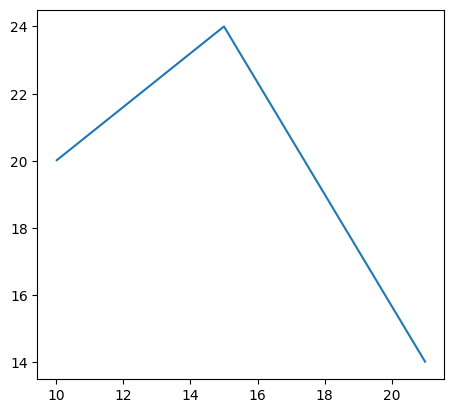

In [111]:
gdf.plot()

## <a id="t22"></a>2.2. Reading a shapefile

However, most of the time we will not be creating our own geometries. Instead, we will be using shapefiles, which is a format for storing geospatial vector data. It is a collection of files that together represent geographic features (points, lines, and polygons) and their associated attributes. Shapefiles are commonly used in geographic information systems (GIS) for mapping and spatial analysis.

A shapefile is not a single file, but rather a set of related files. These files usually have the same name but different extensions. The key components are:

- `.shp (Shape file)`: This file contains the actual geometric data (points, lines, or polygons). It stores the coordinates that represent the shape of each feature.

- `.shx (Shape Index file)`: This file stores the index of the geometries in the .shp file, allowing for efficient access to specific features without needing to load the entire file.

- `.dbf (Attribute file)`: This file contains attribute data in a tabular format. For each geographic feature in the .shp file, there is a corresponding row in the .dbf file. The .dbf file follows the dBase format and stores non-spatial data (e.g., names, IDs, or other properties related to the features).

It is important to know that all the files must be stored together in order to work with them.

### `.read_file`
The `.read_file` function of Geopandas allows us to read directly shapefiles objetcs.

In [112]:
ecuador_3 = gpd.read_file('../02_data/shapefiles/nivel-politico-3.shp')

Geopandas automatically reads shapefiles as GeoDataFrame

In [113]:
type(ecuador_3)

geopandas.geodataframe.GeoDataFrame

In the case of spatial data from countries, the geometry column contains the information of polygons

In [114]:
ecuador_3.head()

,FEATURE_ID,TERRITORY_,NAME,LEVEL_1,LEVEL_2,LEVEL_3,CATEGORY,TYPE,NAME_PT_BR,geometry
0,26,nivel-politico-3,Lago Agrio,Ecuador,Sucumbios,None,None,None,Lago Agrio [Sucumbios] [Ecuador],"POLYGON Z ((-76.41206 0.24167 0, -76.41204 0.2..."
1,27,nivel-politico-3,CaÃ±ar,Ecuador,CaÃ±ar,None,None,None,CaÃ±ar [CaÃ±ar] [Ecuador],"POLYGON Z ((-79.09026 -2.27808 0, -79.09027 -2..."
2,28,nivel-politico-3,Riobamba,Ecuador,Chimborazo,None,None,None,Riobamba [Chimborazo] [Ecuador],"POLYGON Z ((-78.54699 -1.59052 0, -78.54692 -1..."
3,29,nivel-politico-3,El Triunfo,Ecuador,Guayas,None,None,None,El Triunfo [Guayas] [Ecuador],"POLYGON Z ((-79.14295 -2.21258 0, -79.14295 -2..."
4,30,nivel-politico-3,Cumanda,Ecuador,Chimborazo,None,None,None,Cumanda [Chimborazo] [Ecuador],"POLYGON Z ((-79.09026 -2.27808 0, -79.09025 -2..."


We can plot the GeoDataFrame to visualize the country the polygons form.

<Axes: >

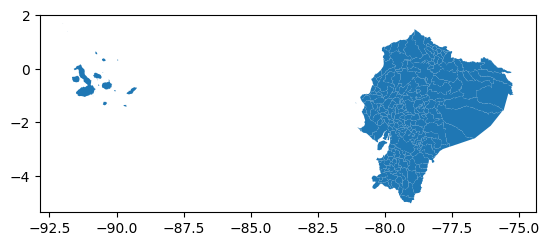

In [115]:
ecuador_3.plot()

We can also read a file with more detailed geographical information. In this case, the shapefile contains data that includes the parrishes of Ecuador, allowing for a more detailed map to be plotted.

In [116]:
ecuador_4 = gpd.read_file('../02_data/shapefiles/nivel-politico-4.shp')

In [117]:
ecuador_4.head()

,FEATURE_ID,TERRITORY_,NAME,LEVEL_1,LEVEL_2,LEVEL_3,CATEGORY,TYPE,NAME_PT_BR,geometry
0,247,nivel-politico-4,ARENILLAS,Ecuador,EL ORO,ARENILLAS,None,None,ARENILLAS [ARENILLAS] [EL ORO] [Ecuador],"POLYGON Z ((-80.10296 -3.51585 0, -80.10292 -3..."
1,248,nivel-politico-4,CHACRAS,Ecuador,EL ORO,ARENILLAS,None,None,CHACRAS [ARENILLAS] [EL ORO] [Ecuador],"POLYGON Z ((-80.10681 -3.51585 0, -80.11497 -3..."
2,249,nivel-politico-4,PALMALES,Ecuador,EL ORO,ARENILLAS,None,None,PALMALES [ARENILLAS] [EL ORO] [Ecuador],"POLYGON Z ((-80.11299 -3.61149 0, -80.11296 -3..."
3,250,nivel-politico-4,CARCABÃN,Ecuador,EL ORO,ARENILLAS,None,None,CARCABÃN [ARENILLAS] [EL ORO] [Ecuador],"POLYGON Z ((-80.19506 -3.70124 0, -80.19494 -3..."
4,251,nivel-politico-4,PACCHA,Ecuador,EL ORO,ATAHUALPA,None,None,PACCHA [ATAHUALPA] [EL ORO] [Ecuador],"POLYGON Z ((-79.64121 -3.60609 0, -79.64122 -3..."


<Axes: >

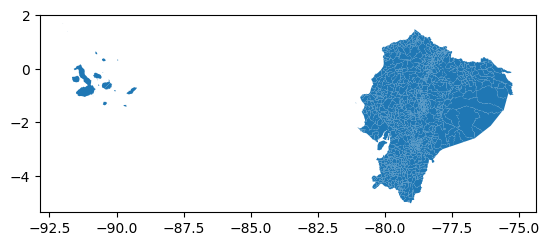

In [118]:
ecuador_4.plot()

We can also zoom out and instead, visualize the provinces

In [119]:
ecuador_2 = gpd.read_file('../02_data/shapefiles/nivel-politico-2.shp')

<Axes: >

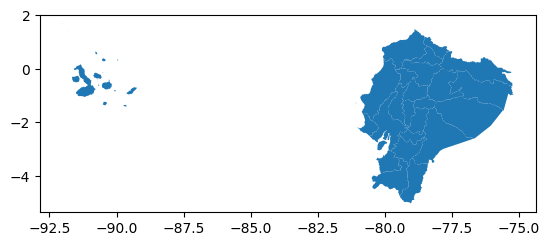

In [120]:
ecuador_2.plot()

Or even the whole country, without any political divisions

In [121]:
ecuador_1 = gpd.read_file('../02_data/shapefiles/nivel-politico-1.shp')

<Axes: >

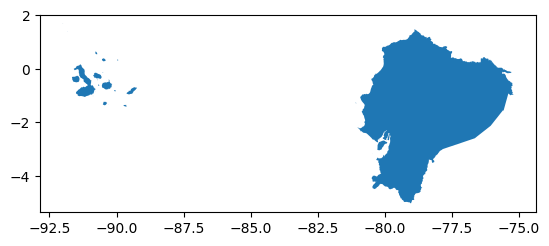

In [122]:
ecuador_1.plot()

## <a id="t23"></a>2.3. Customizing the shapefile plot


### `.boundary.plot()`

We can use the `boundary` attribute to plot only the edges of the shapefile. This way, we can have the outlines of the political divisions of a country.


<Axes: >

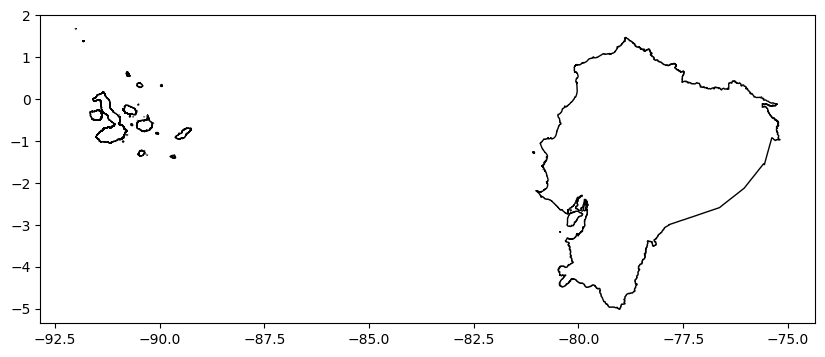

In [123]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
ecuador_1.boundary.plot(ax=ax, linewidth=1, edgecolor='black')

<Axes: >

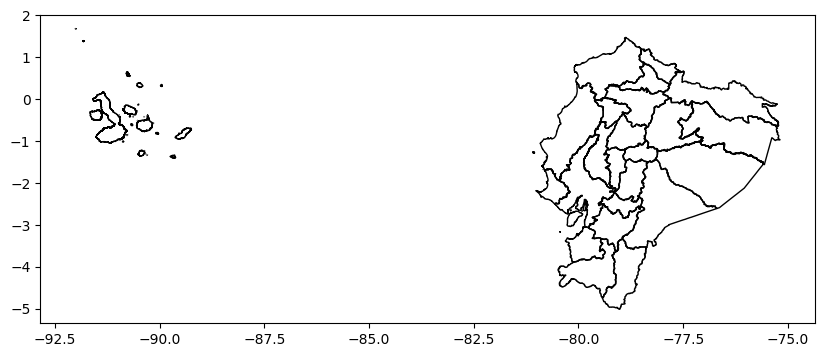

In [124]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
ecuador_2.boundary.plot(ax=ax, linewidth=1, edgecolor='black')

<Axes: >

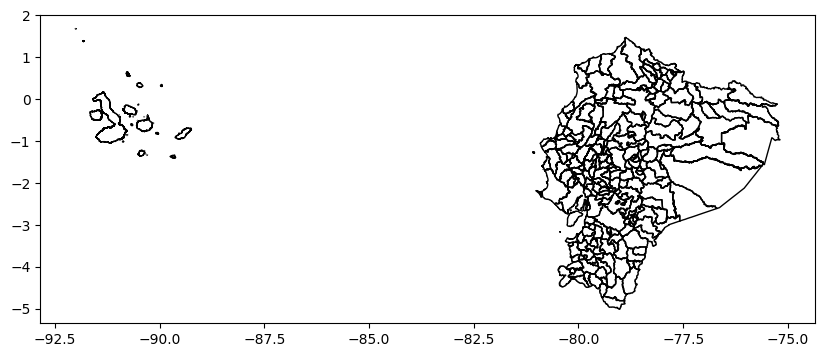

In [125]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
ecuador_3.boundary.plot(ax=ax, linewidth=1, edgecolor='black')

<Axes: >

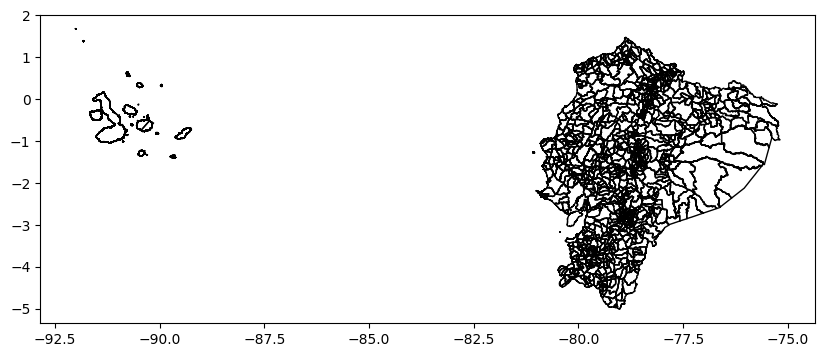

In [126]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
ecuador_4.boundary.plot(ax=ax, linewidth=1, edgecolor='black')

### `cmap`
We can customize out plot with the colormap or `cmap` argument inside the `.plot()` function. We can have different colormaps depending on how we want to portray our data.

In [127]:
from matplotlib import colormaps
list(colormaps)

['magma',
 'inferno',
 'plasma',
 'viridis',
 'cividis',
 'twilight',
 'twilight_shifted',
 'turbo',
 'Blues',
 'BrBG',
 'BuGn',
 'BuPu',
 'CMRmap',
 'GnBu',
 'Greens',
 'Greys',
 'OrRd',
 'Oranges',
 'PRGn',
 'PiYG',
 'PuBu',
 'PuBuGn',
 'PuOr',
 'PuRd',
 'Purples',
 'RdBu',
 'RdGy',
 'RdPu',
 'RdYlBu',
 'RdYlGn',
 'Reds',
 'Spectral',
 'Wistia',
 'YlGn',
 'YlGnBu',
 'YlOrBr',
 'YlOrRd',
 'afmhot',
 'autumn',
 'binary',
 'bone',
 'brg',
 'bwr',
 'cool',
 'coolwarm',
 'copper',
 'cubehelix',
 'flag',
 'gist_earth',
 'gist_gray',
 'gist_heat',
 'gist_ncar',
 'gist_rainbow',
 'gist_stern',
 'gist_yarg',
 'gnuplot',
 'gnuplot2',
 'gray',
 'hot',
 'hsv',
 'jet',
 'nipy_spectral',
 'ocean',
 'pink',
 'prism',
 'rainbow',
 'seismic',
 'spring',
 'summer',
 'terrain',
 'winter',
 'Accent',
 'Dark2',
 'Paired',
 'Pastel1',
 'Pastel2',
 'Set1',
 'Set2',
 'Set3',
 'tab10',
 'tab20',
 'tab20b',
 'tab20c',
 'grey',
 'gist_grey',
 'gist_yerg',
 'Grays',
 'magma_r',
 'inferno_r',
 'plasma_r',
 'viri

<Axes: >

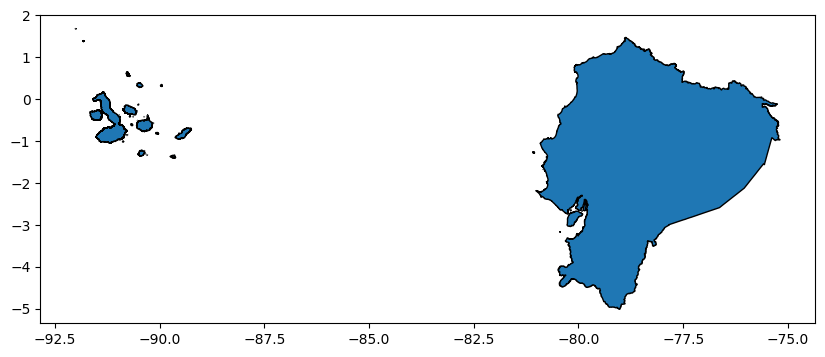

In [128]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
ecuador_1.plot(ax=ax, linewidth=1, edgecolor='black', cmap='tab20')

<Axes: >

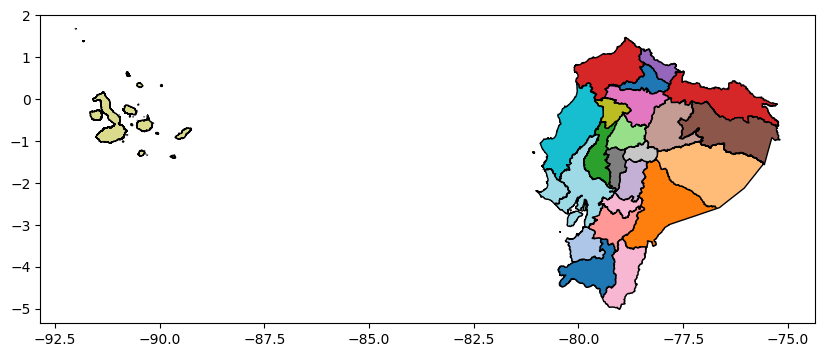

In [129]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
ecuador_2.plot(ax=ax, linewidth=1, edgecolor='black', cmap='tab20')

<Axes: >

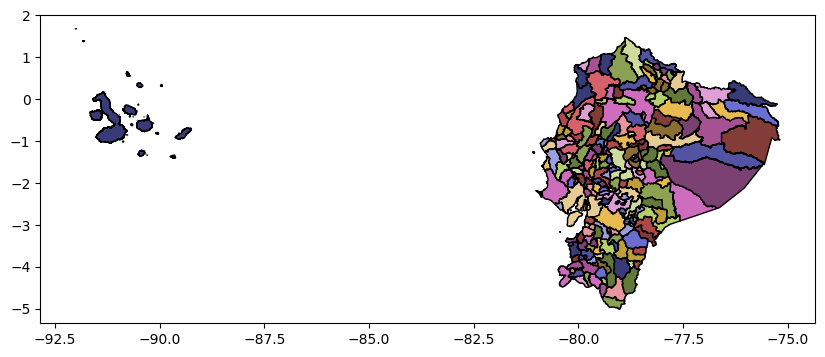

In [130]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
ecuador_3.plot(ax=ax, linewidth=1, edgecolor='black', cmap='tab20b_r')

<Axes: >

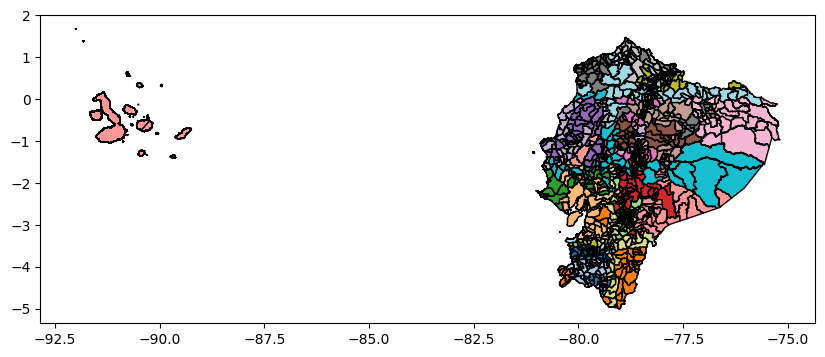

In [131]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
ecuador_4.plot(ax=ax, linewidth=1, edgecolor='black', cmap='tab20')

<Axes: >

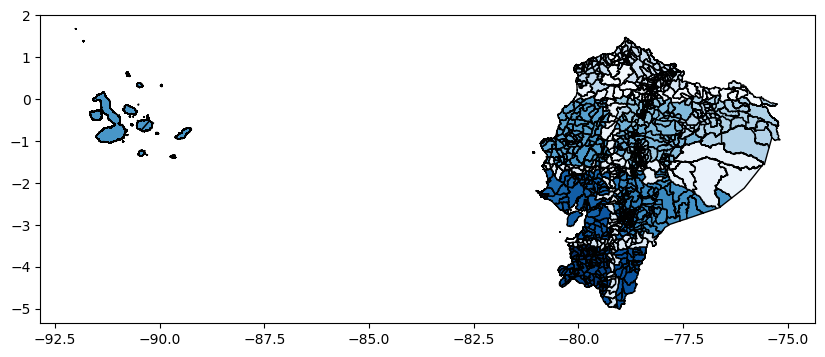

In [132]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
ecuador_4.plot(ax=ax, linewidth=1, edgecolor='black', cmap='Blues_r')

If out shapefile contains additional information to the geospatial data, we can also visualize it

In [133]:
population = gpd.read_file('../02_data/shapefiles/pop_shape7.shp')
population.head(3)

,DPA_VAL,DPA_ANI,DPA_CAN,DPA_DESC,DPA_PRO,DPA_DESP,Nmbrdcn,Codigo,2001,2002,...,2013,2014,2015,2016,2017,2018,2019,2020,mean,geometry
0,0,2011,0101,CUENCA,01,AZUAY,CUENCA,0101,441230,449537,...,558127,569416,580706,591996,603269,614539,625775,636996,533856.95,"POLYGON ((-79.39734 -2.49713, -79.39698 -2.497..."
1,0,2011,0102,GIRON,01,AZUAY,GIRON,0102,13357,13331,...,13195,13187,13175,13157,13134,13107,13074,13037,13203.85,"POLYGON ((-79.22802 -3.0653, -79.22774 -3.0654..."
2,0,2011,0103,GUALACEO,01,AZUAY,GUALACEO,0103,40776,41150,...,45997,46482,46954,47411,47855,48286,48702,49104,44848.55,"POLYGON ((-78.69723 -2.80718, -78.6963 -2.8079..."


In [134]:
population["mean"].describe()

count    2.210000e+02
mean     6.840655e+04
std      2.331227e+05
min      1.976050e+03
25%      1.196050e+04
50%      2.490630e+04
75%      5.363500e+04
max      2.447577e+06
Name: mean, dtype: float64

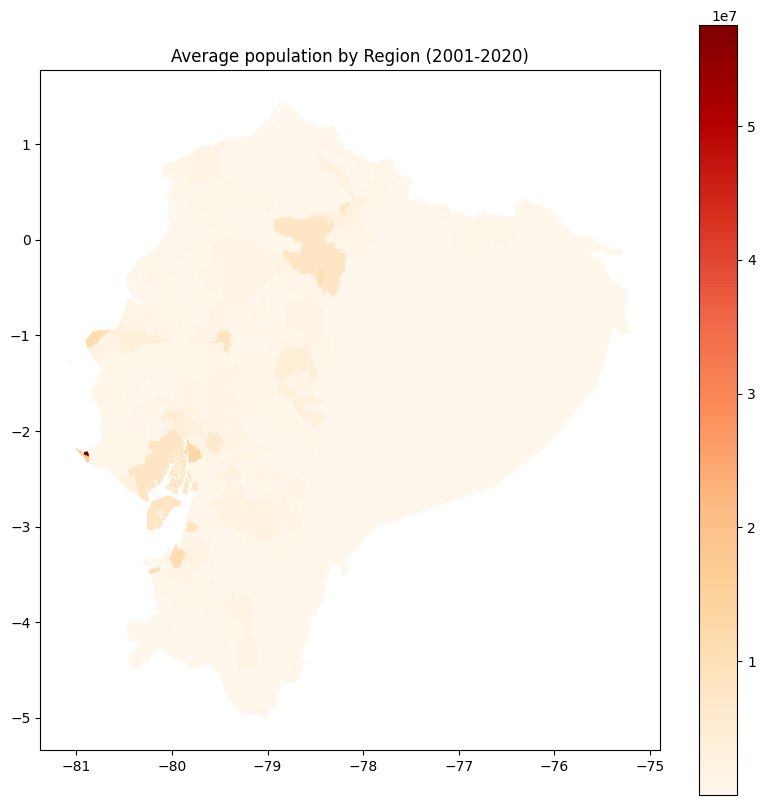

In [135]:
# Calculate population density
population['density'] = population['2020'] / population['geometry'].area

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
population.plot(column='density', cmap='OrRd', legend=True, ax=ax)
ax.set_title("Average population by Region (2001-2020)")
plt.show()


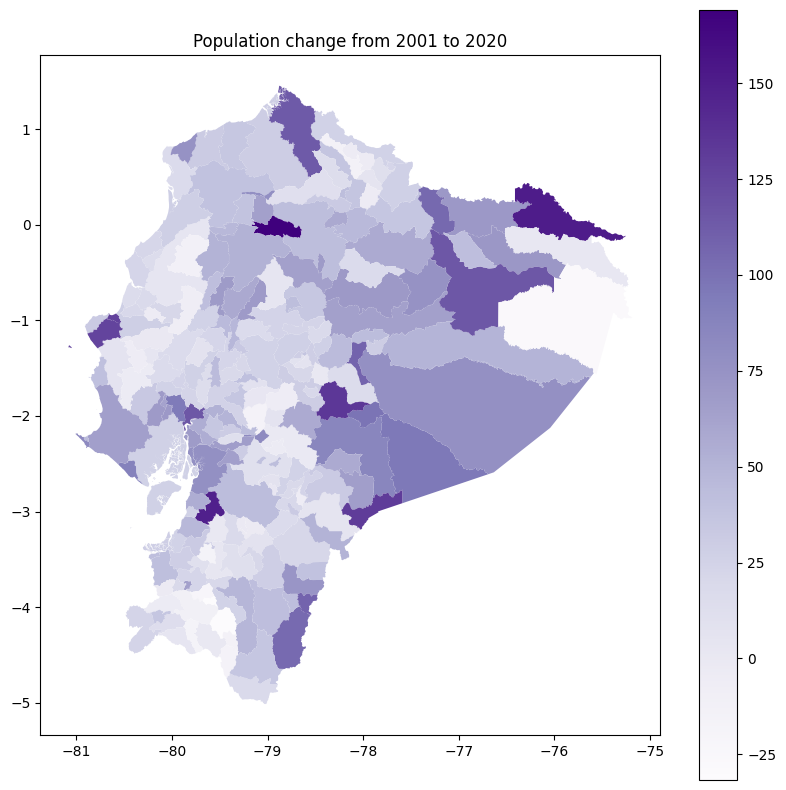

In [136]:
population['pop_change'] = (population['2020'] - population['2001'])/population['2001']*100

# Plot the population change
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
population.plot(column='pop_change', cmap='Purples', legend=True, ax=ax)
ax.set_title("Population change from 2001 to 2020")
plt.show()

In [137]:
end = time.time()
timelapse = end - start
timelapse

66.56960225105286